## Imports

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from lib.sb_utils import save_file

## Load Data

In [3]:
credit_data = pd.read_csv('../data/credit_data_cleaned.csv')

In [4]:
credit_data.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,21,9600,5.0,2,1000,11.14,0,0.10,0,2,1,0,0,0,0,0,1,0
1,25,9600,1.0,3,5500,12.87,1,0.57,0,3,0,0,1,0,0,0,0,0
2,23,65500,4.0,3,35000,15.23,1,0.53,0,2,0,0,1,0,0,0,0,1
3,24,54400,8.0,3,35000,14.27,1,0.55,1,4,0,0,1,0,0,0,0,1
4,21,9900,2.0,1,2500,7.14,1,0.25,0,2,0,0,0,0,1,0,1,0


In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32574 non-null  int64  
 1   person_income                32574 non-null  int64  
 2   person_emp_length            32574 non-null  float64
 3   loan_grade                   32574 non-null  int64  
 4   loan_amnt                    32574 non-null  int64  
 5   loan_int_rate                32574 non-null  float64
 6   loan_status                  32574 non-null  int64  
 7   loan_percent_income          32574 non-null  float64
 8   cb_person_default_on_file    32574 non-null  int64  
 9   cb_person_cred_hist_length   32574 non-null  int64  
 10  loan_intent_EDUCATION        32574 non-null  int64  
 11  loan_intent_HOMEIMPROVEMENT  32574 non-null  int64  
 12  loan_intent_MEDICAL          32574 non-null  int64  
 13  loan_intent_PERS

## Feature Visualizations

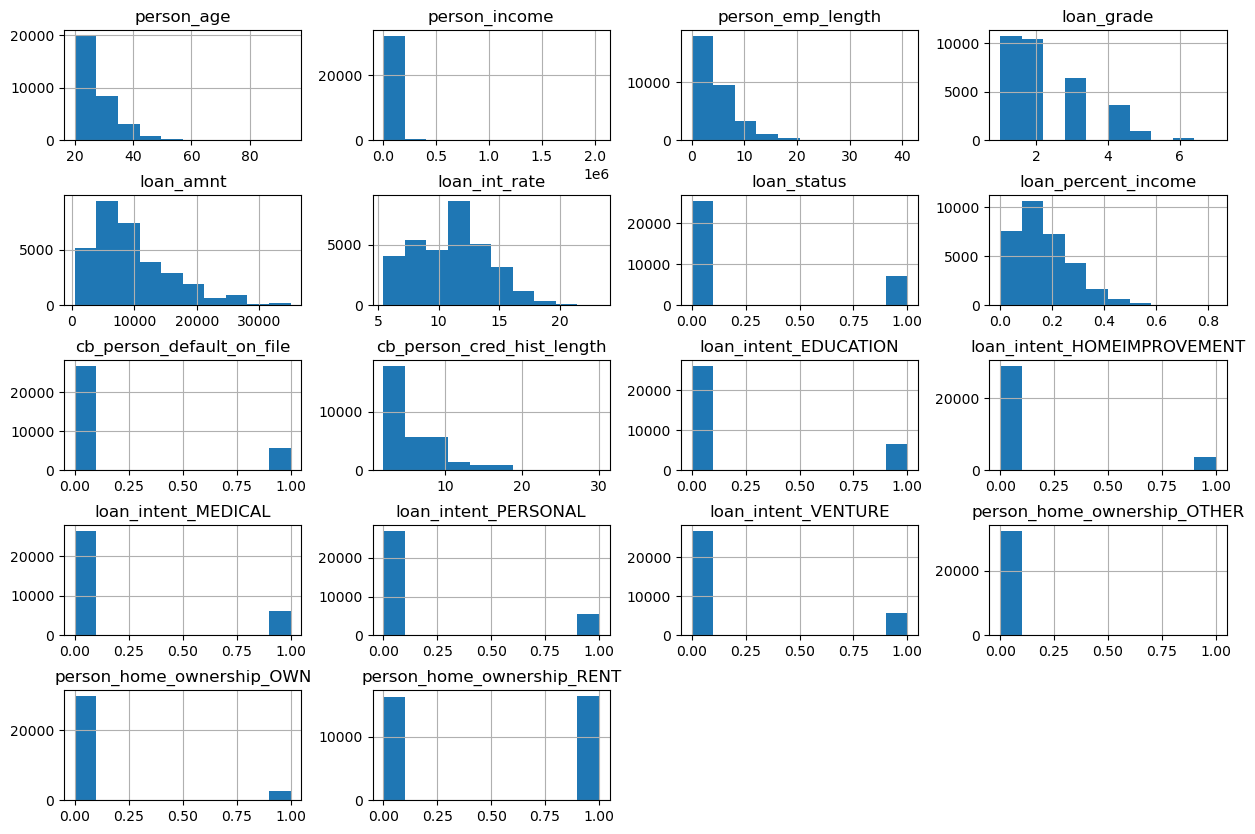

In [6]:
# Feature distributions
credit_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

## Loan Status Visualizations

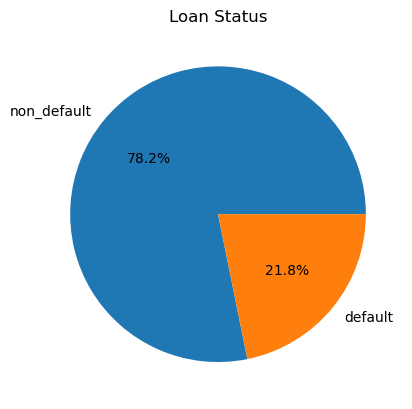

In [7]:
# Loan Status Pie Chart
credit_data['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['non_default', 'default'])
plt.title('Loan Status')
plt.ylabel('')
plt.show()

Response variable is somewhat unbalanced.

## Feature Analysis

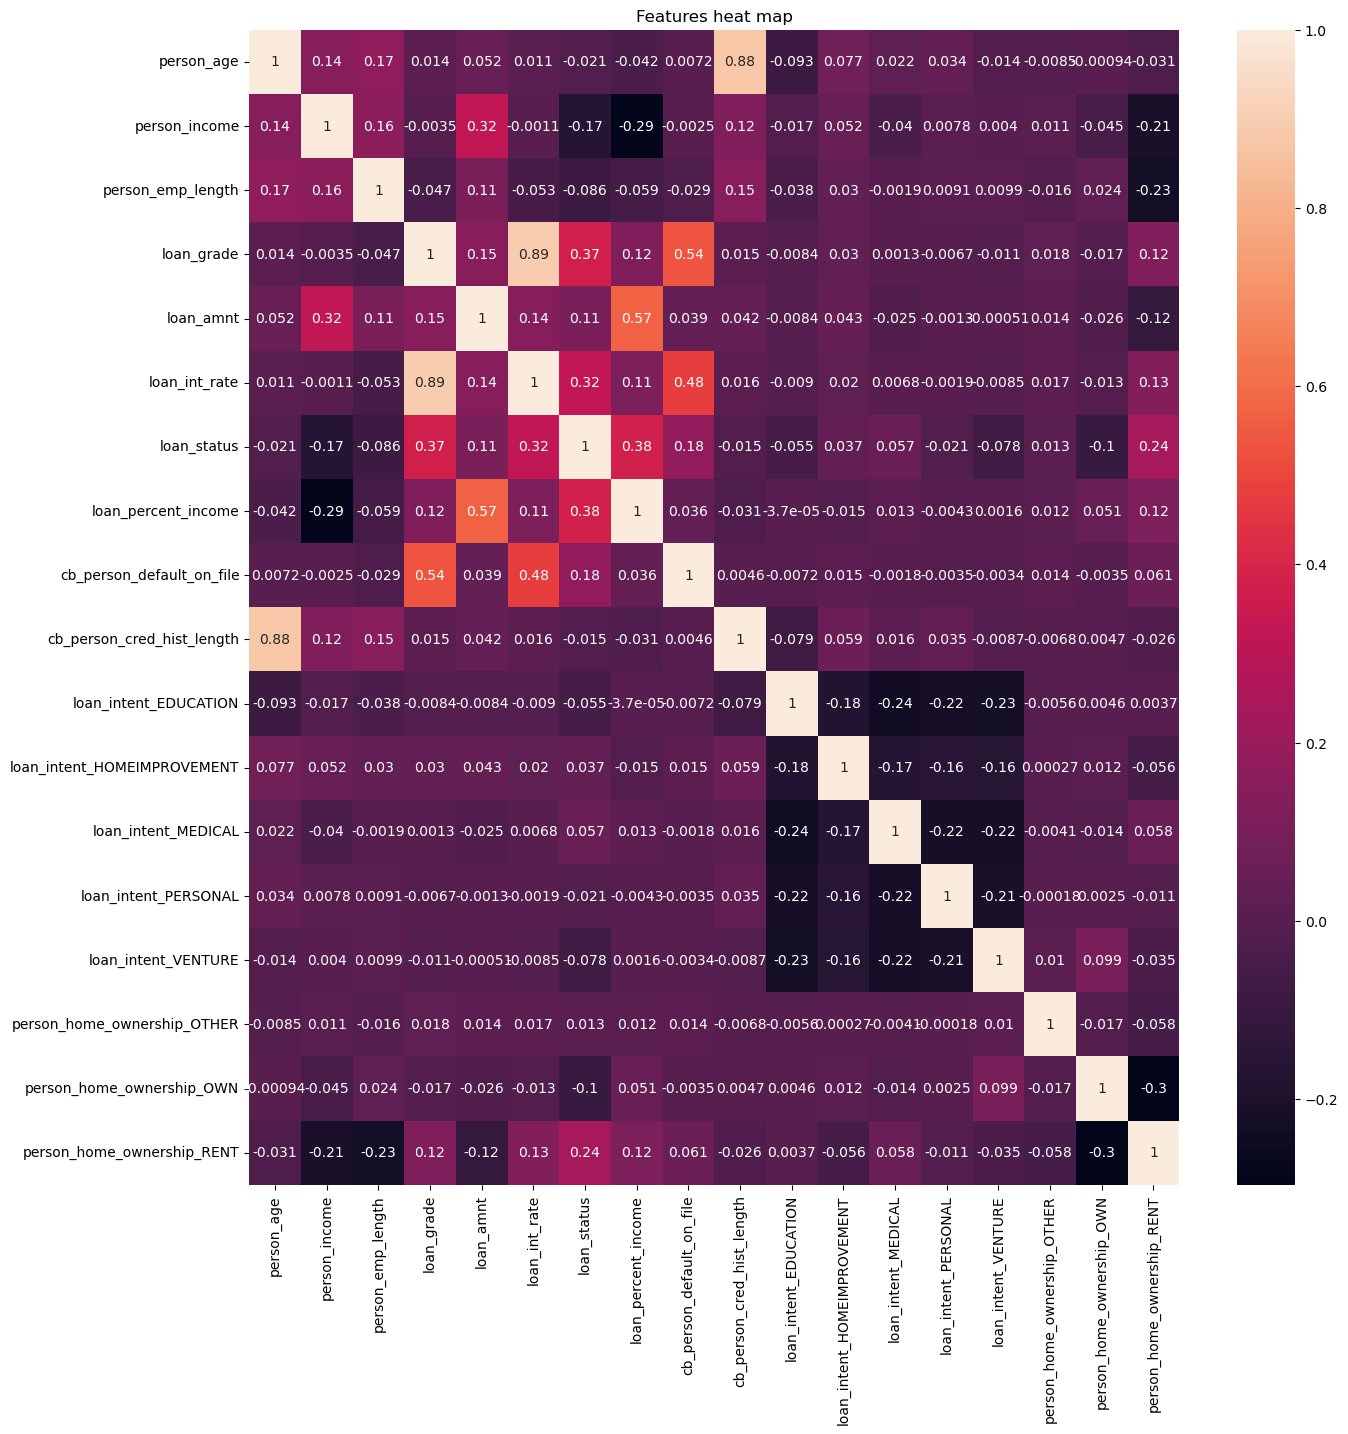

In [8]:
# Features heat map
plt.subplots(figsize=(15,15))
sns.heatmap(credit_data.select_dtypes(include='number').corr().T, annot=True)
plt.title('Features heat map');

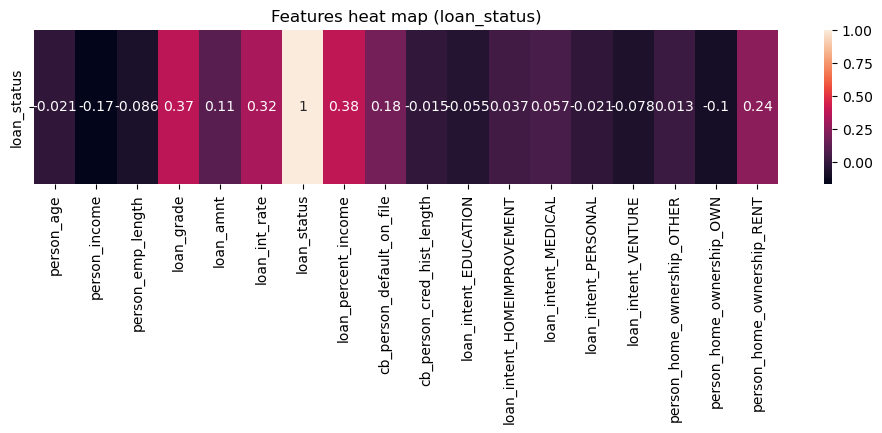

In [9]:
# Heatmap with only feature of interest
plt.subplots(figsize=(12,2))
sns.heatmap(credit_data.corr()[['loan_status']].T, annot=True)
plt.title('Features heat map (loan_status)');

When looking at the feature of interest, loan_status, it can be seen that the features
'loan_percent_income', 'loan_grade', and 'loan_int_rate' are undoubtedly the most significant contributers to loan_status

In [10]:
def boxplots(columns, ncol, figsize=(15, 8)):
    # Filter numeric columns
    numeric_columns = [col for col in columns if np.issubdtype(credit_data[col].dtype, np.number)]
    
    nrow = int(np.ceil(len(numeric_columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    
    for i, col in enumerate(numeric_columns):
        ax = axes.flatten()[i]
        
        categories = credit_data['loan_status'].unique()
        data_to_plot = [credit_data[credit_data['loan_status'] == cat][col] for cat in categories]
        
        ax.boxplot(data_to_plot, tick_labels=['No Default', 'Default'], patch_artist=True)
        ax.set_ylabel(col)
        ax.tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

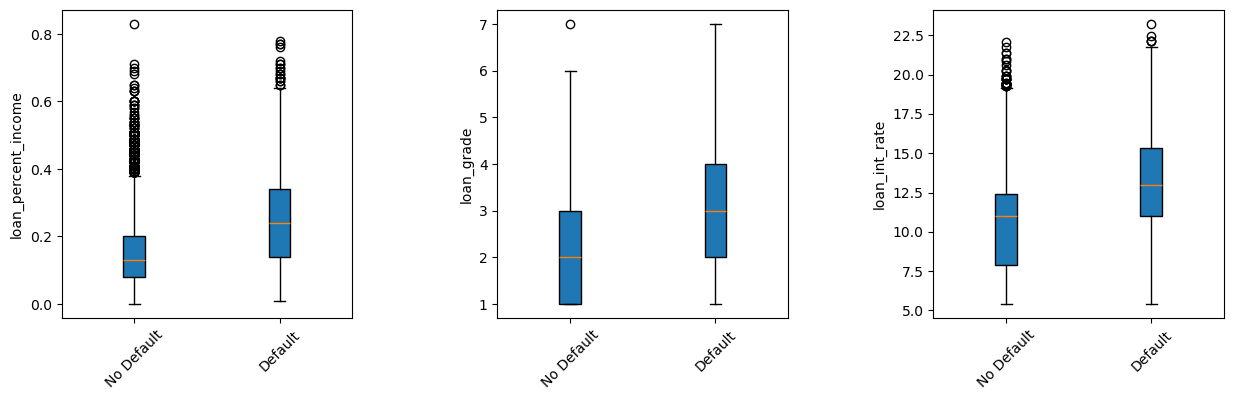

In [11]:
# Boxplots of the most important features
features = credit_data[['loan_percent_income', 'loan_grade', 'loan_int_rate']]
boxplots(features, ncol=3, figsize=(15, 15))

In [12]:
def boxplots(columns, ncol, figsize=(15, 8)):
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    
    axes = np.array(axes).flatten() if nrow*ncol > 1 else [axes]
    
    for i, col in enumerate(columns):
        means = credit_data.groupby('loan_status')[col].mean()
        medians = credit_data.groupby('loan_status')[col].median()
        stats = pd.DataFrame({'Mean': means, 'Median': medians})
        stats.plot(kind='bar', ax=axes[i])
        axes[i].set_ylabel(col)
        axes[i].set_xticklabels(['No Default', 'Default'], rotation=45)
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes[empty].set_visible(False)

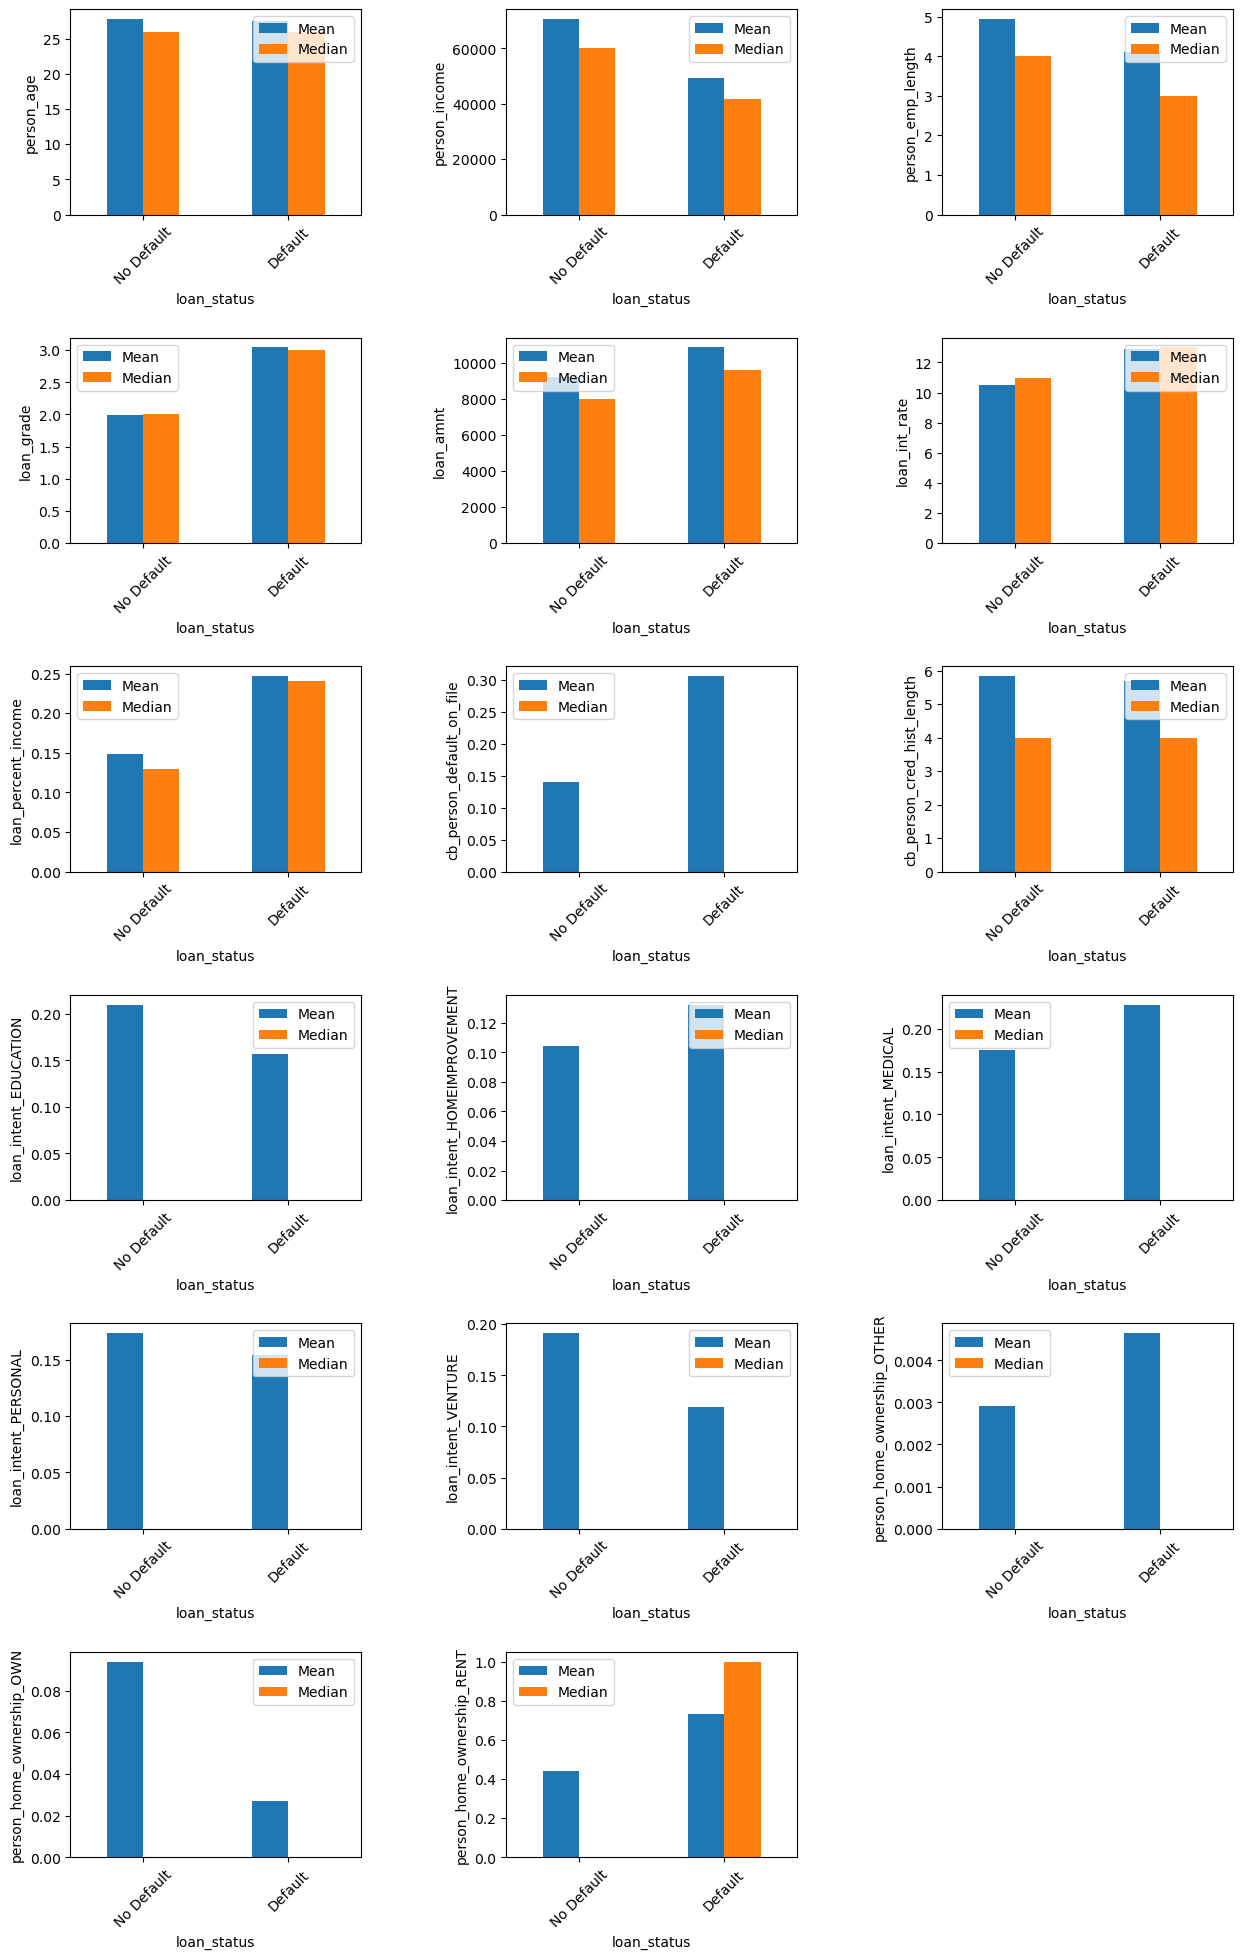

In [13]:
# Bar plots with the mean and median seperated by whether the person defaulted or not
boxplots(credit_data.drop(['loan_status'], axis=1).columns, ncol=3)


The following is a full description of the features:<br>
<br>
person_age: Age <br>
person_income: Annual Income <br>
person_home_ownership: Home ownership <br>
person_emp_length: Employment length <br>
loan_intent: Loan intent <br>
loan_grade: Loan grade <br>
loan_amnt: Loan amount <br>
loan_int_rate: Interest rate <br>
loan_status: Loan status (0 is non default 1 is default) <br>
loan_percent_income: Loan's percent income <br>
cb_person_default_on_file: Historical default <br>
cb_preson_cred_hist_length: Credit history length <br>
<br>

In [14]:
# Statistical elements of features
credit_data.describe()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
count,32574.000000,3.257400e+04,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000
mean,27.718426,6.587848e+04,4.760576,2.218149,9588.018051,11.009470,0.218180,0.170202,0.176337,5.804108,0.198041,0.110671,0.186376,0.169430,0.175477,0.003285,0.079327,0.504758
std,6.204987,5.253194e+04,3.981181,1.166382,6320.249598,3.081664,0.413017,0.106755,0.381112,4.053873,0.398530,0.313729,0.389415,0.375137,0.380381,0.057220,0.270253,0.499985
min,20.000000,4.000000e+03,0.000000,1.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,1.000000,5000.000000,8.490000,0.000000,0.090000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,2.000000,8000.000000,10.990000,0.000000,0.150000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,30.000000,7.920000e+04,7.000000,3.000000,12200.000000,13.110000,0.000000,0.230000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,94.000000,2.039784e+06,41.000000,7.000000,35000.000000,23.220000,1.000000,0.830000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Summary

In [15]:
credit_data.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,21,9600,5.0,2,1000,11.14,0,0.10,0,2,1,0,0,0,0,0,1,0
1,25,9600,1.0,3,5500,12.87,1,0.57,0,3,0,0,1,0,0,0,0,0
2,23,65500,4.0,3,35000,15.23,1,0.53,0,2,0,0,1,0,0,0,0,1
3,24,54400,8.0,3,35000,14.27,1,0.55,1,4,0,0,1,0,0,0,0,1
4,21,9900,2.0,1,2500,7.14,1,0.25,0,2,0,0,0,0,1,0,1,0
